## Reproducible Analysis & Models for Predicting Genomics Workflow Execution Time



In [3]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score






dataset source :[link text](https://www.cancer.gov/ccg/research/genome-sequencing/tcga)
[link text](https://https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%2C%7B%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-BRCA%22%5D%7D%2C%22op%22%3A%22in%22%7D%5D%7D&searchTableTab=cases )

This dataset contains 

Case UUID	dcd5860c-7e3a-44f3-a732-fe92fe3fe300

Case ID	TCGA-AN-A046

Project	TCGA-BRCA

Project Name	Breast Invasive Carcinoma

Disease Type	Ductal and Lobular Neoplasms

Program	TCGA

Primary Site	Breast

Data Category	Files	( n=67 )
Sequencing Reads	6	
Transcriptome Profiling	4	
Simple Nucleotide Variation	16	
Copy Number Variation	8	
DNA Methylation	3	
Clinical	11	
Biospecimen








In [4]:
import pandas as pd
BC= pd.read_csv("/content/breast cancer.csv")
BC

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/0/data_category,summary/data_categories/1/file_count,summary/data_categories/1/data_category,summary/data_categories/2/file_count,summary/data_categories/2/data_category,summary/data_categories/3/file_count,summary/data_categories/3/data_category,summary/data_categories/4/file_count,...,summary/data_categories/6/file_count,summary/data_categories/6/data_category,summary/data_categories/7/file_count,summary/data_categories/7/data_category,summary/data_categories/8/file_count,summary/data_categories/8/data_category,primary_site,project/project_id,submitter_id,demographic/gender
0,68,6,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-AR-A0TQ,female
1,55,7,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,2,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-AO-A03N,female
2,67,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-OL-A5S0,female
3,66,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,NaN,NaN,Breast,TCGA-BRCA,TCGA-BH-A0HI,female
4,69,8,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-GM-A3XL,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,64,5,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,2,...,11,Clinical,4.0,Structural Variation,NaN,NaN,Breast,TCGA-BRCA,TCGA-E9-A1NC,female
1094,68,6,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-B6-A0I9,female
1095,106,11,Sequencing Reads,15,Biospecimen,13,Copy Number Variation,31,Simple Nucleotide Variation,8,...,12,Clinical,8.0,Structural Variation,2.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-E2-A15A,female
1096,67,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-C8-A26V,female


In [5]:
# applying ffill() method to fill the missing values
BC.ffill(axis = 1)


,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/0/data_category,summary/data_categories/1/file_count,summary/data_categories/1/data_category,summary/data_categories/2/file_count,summary/data_categories/2/data_category,summary/data_categories/3/file_count,summary/data_categories/3/data_category,summary/data_categories/4/file_count,...,summary/data_categories/6/file_count,summary/data_categories/6/data_category,summary/data_categories/7/file_count,summary/data_categories/7/data_category,summary/data_categories/8/file_count,summary/data_categories/8/data_category,primary_site,project/project_id,submitter_id,demographic/gender
0,68,6,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-AR-A0TQ,female
1,55,7,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,2,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-AO-A03N,female
2,67,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-OL-A5S0,female
3,66,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,Structural Variation,Structural Variation,Breast,TCGA-BRCA,TCGA-BH-A0HI,female
4,69,8,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-GM-A3XL,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,64,5,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,2,...,11,Clinical,4.0,Structural Variation,Structural Variation,Structural Variation,Breast,TCGA-BRCA,TCGA-E9-A1NC,female
1094,68,6,Sequencing Reads,15,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-B6-A0I9,female
1095,106,11,Sequencing Reads,15,Biospecimen,13,Copy Number Variation,31,Simple Nucleotide Variation,8,...,12,Clinical,8.0,Structural Variation,2.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-E2-A15A,female
1096,67,6,Sequencing Reads,14,Biospecimen,8,Copy Number Variation,16,Simple Nucleotide Variation,4,...,11,Clinical,4.0,Structural Variation,1.0,Proteome Profiling,Breast,TCGA-BRCA,TCGA-C8-A26V,female


In [6]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   summary/file_count                       1098 non-null   int64  
 1   summary/data_categories/0/file_count     1098 non-null   int64  
 2   summary/data_categories/0/data_category  1098 non-null   object 
 3   summary/data_categories/1/file_count     1098 non-null   int64  
 4   summary/data_categories/1/data_category  1098 non-null   object 
 5   summary/data_categories/2/file_count     1098 non-null   int64  
 6   summary/data_categories/2/data_category  1098 non-null   object 
 7   summary/data_categories/3/file_count     1098 non-null   int64  
 8   summary/data_categories/3/data_category  1098 non-null   object 
 9   summary/data_categories/4/file_count     1098 non-null   int64  
 10  summary/data_categories/4/data_category  1098 no

In [7]:
BC.describe()

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/1/file_count,summary/data_categories/2/file_count,summary/data_categories/3/file_count,summary/data_categories/4/file_count,summary/data_categories/5/file_count,summary/data_categories/6/file_count,summary/data_categories/7/file_count,summary/data_categories/8/file_count
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1097.000000,877.000000
mean,69.484517,6.752277,14.832423,8.095628,15.583789,4.443534,3.399818,11.060109,4.487694,1.043330
std,9.793689,1.930095,1.150944,1.165033,3.975861,1.467049,1.115679,0.457922,1.476731,0.209243
min,47.000000,2.000000,13.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000
25%,67.000000,6.000000,14.000000,8.000000,16.000000,4.000000,3.000000,11.000000,4.000000,1.000000
50%,67.000000,6.000000,15.000000,8.000000,16.000000,4.000000,3.000000,11.000000,4.000000,1.000000
75%,69.000000,7.000000,15.000000,8.000000,16.000000,4.000000,3.000000,11.000000,4.000000,1.000000
max,150.000000,23.000000,21.000000,21.000000,47.000000,16.000000,11.000000,12.000000,16.000000,3.000000


In [8]:
#splitting dataset into training and testing data


from sklearn.model_selection import train_test_split

# Splitting the data to append all training data together and to test remaining data separately
train_normal, test_normal = train_test_split(BC, test_size=0.2)

In [10]:
#dropping those columns which are not relevant for further analysis

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_shuffled = train_normal.sample(frac=1)
train_shuffled_X = train_shuffled.drop(['summary/data_categories/0/data_category', 'summary/data_categories/1/data_category', 'summary/data_categories/2/data_category','summary/data_categories/3/data_category',
                                        'summary/data_categories/4/data_category','summary/data_categories/5/data_category',
                                        'summary/data_categories/6/data_category','summary/data_categories/7/data_category','summary/data_categories/8/data_category',
                                        'primary_site','project/project_id','submitter_id','demographic/gender'], axis=1)
train_shuffled_X.head()

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/1/file_count,summary/data_categories/2/file_count,summary/data_categories/3/file_count,summary/data_categories/4/file_count,summary/data_categories/5/file_count,summary/data_categories/6/file_count,summary/data_categories/7/file_count,summary/data_categories/8/file_count
632,68,6,15,8,16,4,3,11,4.0,1.0
731,67,6,14,8,16,4,3,11,4.0,1.0
83,68,6,15,8,16,4,3,11,4.0,1.0
201,66,6,13,8,16,4,3,11,4.0,1.0
1060,67,6,14,8,16,4,3,11,4.0,1.0


In [11]:
train_shuffled_X.dropna(axis=0)

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/1/file_count,summary/data_categories/2/file_count,summary/data_categories/3/file_count,summary/data_categories/4/file_count,summary/data_categories/5/file_count,summary/data_categories/6/file_count,summary/data_categories/7/file_count,summary/data_categories/8/file_count
632,68,6,15,8,16,4,3,11,4.0,1.0
731,67,6,14,8,16,4,3,11,4.0,1.0
83,68,6,15,8,16,4,3,11,4.0,1.0
201,66,6,13,8,16,4,3,11,4.0,1.0
1060,67,6,14,8,16,4,3,11,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
151,68,6,15,8,16,4,3,11,4.0,1.0
629,67,6,14,8,16,4,3,11,4.0,1.0
91,68,6,15,8,16,4,3,11,4.0,1.0
835,68,6,14,8,16,4,3,12,4.0,1.0


In [12]:
import pandas as pd

# load data into a pandas DataFrame
my_data = pd.read_csv('/content/breast cancer.csv')

# remove rows with any NaN values
my_data = my_data.dropna(axis=0)

# remove columns with any NaN values
# my_data = my_data.dropna(axis=1)

# print the updated DataFrame
print(my_data)


      summary/file_count  summary/data_categories/0/file_count  \
0                     68                                     6   
1                     55                                     7   
2                     67                                     6   
4                     69                                     8   
5                     69                                     7   
...                  ...                                   ...   
1091                  67                                     6   
1094                  68                                     6   
1095                 106                                    11   
1096                  67                                     6   
1097                  67                                     6   

     summary/data_categories/0/data_category  \
0                           Sequencing Reads   
1                           Sequencing Reads   
2                           Sequencing Reads   
4              

In [13]:

train_shuffled_y = train_shuffled['summary/data_categories/0/file_count']
train_shuffled_y1 = train_shuffled['summary/data_categories/1/file_count']
train_shuffled_y2 = train_shuffled['summary/data_categories/2/file_count']
print(train_shuffled_X)
print(train_shuffled_y)

      summary/file_count  summary/data_categories/0/file_count  \
632                   68                                     6   
731                   67                                     6   
83                    68                                     6   
201                   66                                     6   
1060                  67                                     6   
...                  ...                                   ...   
629                   67                                     6   
91                    68                                     6   
835                   68                                     6   
37                    66                                     6   
924                   67                                     6   

      summary/data_categories/1/file_count  \
632                                     15   
731                                     14   
83                                      15   
201                    

In [14]:
#similarly for testing data

test_total_X = test_normal.drop(['summary/data_categories/0/data_category', 'summary/data_categories/1/data_category', 'summary/data_categories/2/data_category','summary/data_categories/3/data_category',
                                        'summary/data_categories/4/data_category','summary/data_categories/5/data_category',
                                        'summary/data_categories/6/data_category','summary/data_categories/7/data_category','summary/data_categories/8/data_category',
                                        'primary_site','project/project_id','submitter_id','demographic/gender'], axis=1)
test_total_y = test_normal['summary/data_categories/2/file_count']
test_total_y_p = test_normal['summary/data_categories/7/file_count']
test_total_y_d = test_normal['summary/data_categories/5/file_count']
print(test_total_X)
print(test_total_y)

      summary/file_count  summary/data_categories/0/file_count  \
97                    64                                     6   
16                    67                                     6   
626                   65                                     6   
633                   68                                     6   
968                   67                                     6   
...                  ...                                   ...   
1056                  67                                     6   
459                   68                                     6   
586                   85                                    10   
800                   52                                     4   
503                   67                                     6   

      summary/data_categories/1/file_count  \
97                                      14   
16                                      14   
626                                     14   
633                    

In [ ]:
#dropping nan values 

In [15]:
test_total_y.dropna(axis=0)

97      8
16      8
626     8
633     8
968     8
       ..
1056    8
459     8
586     8
800     8
503     8
Name: summary/data_categories/2/file_count, Length: 220, dtype: int64

In [16]:
test_total_X.dropna(axis=0)

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/1/file_count,summary/data_categories/2/file_count,summary/data_categories/3/file_count,summary/data_categories/4/file_count,summary/data_categories/5/file_count,summary/data_categories/6/file_count,summary/data_categories/7/file_count,summary/data_categories/8/file_count
16,67,6,14,8,16,4,3,11,4.0,1.0
626,65,6,14,8,14,4,3,11,4.0,1.0
633,68,6,15,8,16,4,3,11,4.0,1.0
968,67,6,14,8,16,4,3,11,4.0,1.0
1097,67,6,14,8,16,4,3,11,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1056,67,6,14,8,16,4,3,11,4.0,1.0
459,68,6,15,8,16,4,3,11,4.0,1.0
586,85,10,17,8,16,8,6,11,8.0,1.0
800,52,4,15,8,2,4,3,11,4.0,1.0


In [19]:
train_shuffled_X.dropna(axis=1)

,summary/file_count,summary/data_categories/0/file_count,summary/data_categories/1/file_count,summary/data_categories/2/file_count,summary/data_categories/3/file_count,summary/data_categories/4/file_count,summary/data_categories/5/file_count,summary/data_categories/6/file_count,summary/data_categories/7/file_count
632,68,6,15,8,16,4,3,11,4.0
731,67,6,14,8,16,4,3,11,4.0
83,68,6,15,8,16,4,3,11,4.0
201,66,6,13,8,16,4,3,11,4.0
1060,67,6,14,8,16,4,3,11,4.0
...,...,...,...,...,...,...,...,...,...
629,67,6,14,8,16,4,3,11,4.0
91,68,6,15,8,16,4,3,11,4.0
835,68,6,14,8,16,4,3,12,4.0
37,66,6,14,8,16,4,3,11,4.0


## DATA VISUALISATION

In [ ]:
#SCATTERPLOT

<Axes: xlabel='summary/data_categories/1/file_count', ylabel='summary/data_categories/2/file_count'>

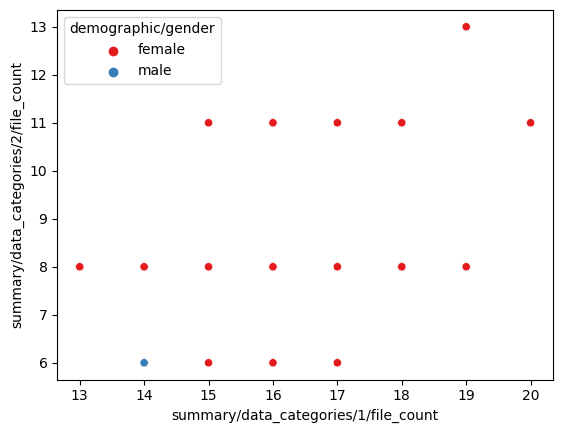

In [21]:
sns.scatterplot(x="summary/data_categories/1/file_count", y="summary/data_categories/2/file_count", hue="demographic/gender", data=test_normal, palette='Set1')

In [ ]:
#PAIRPLOT

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


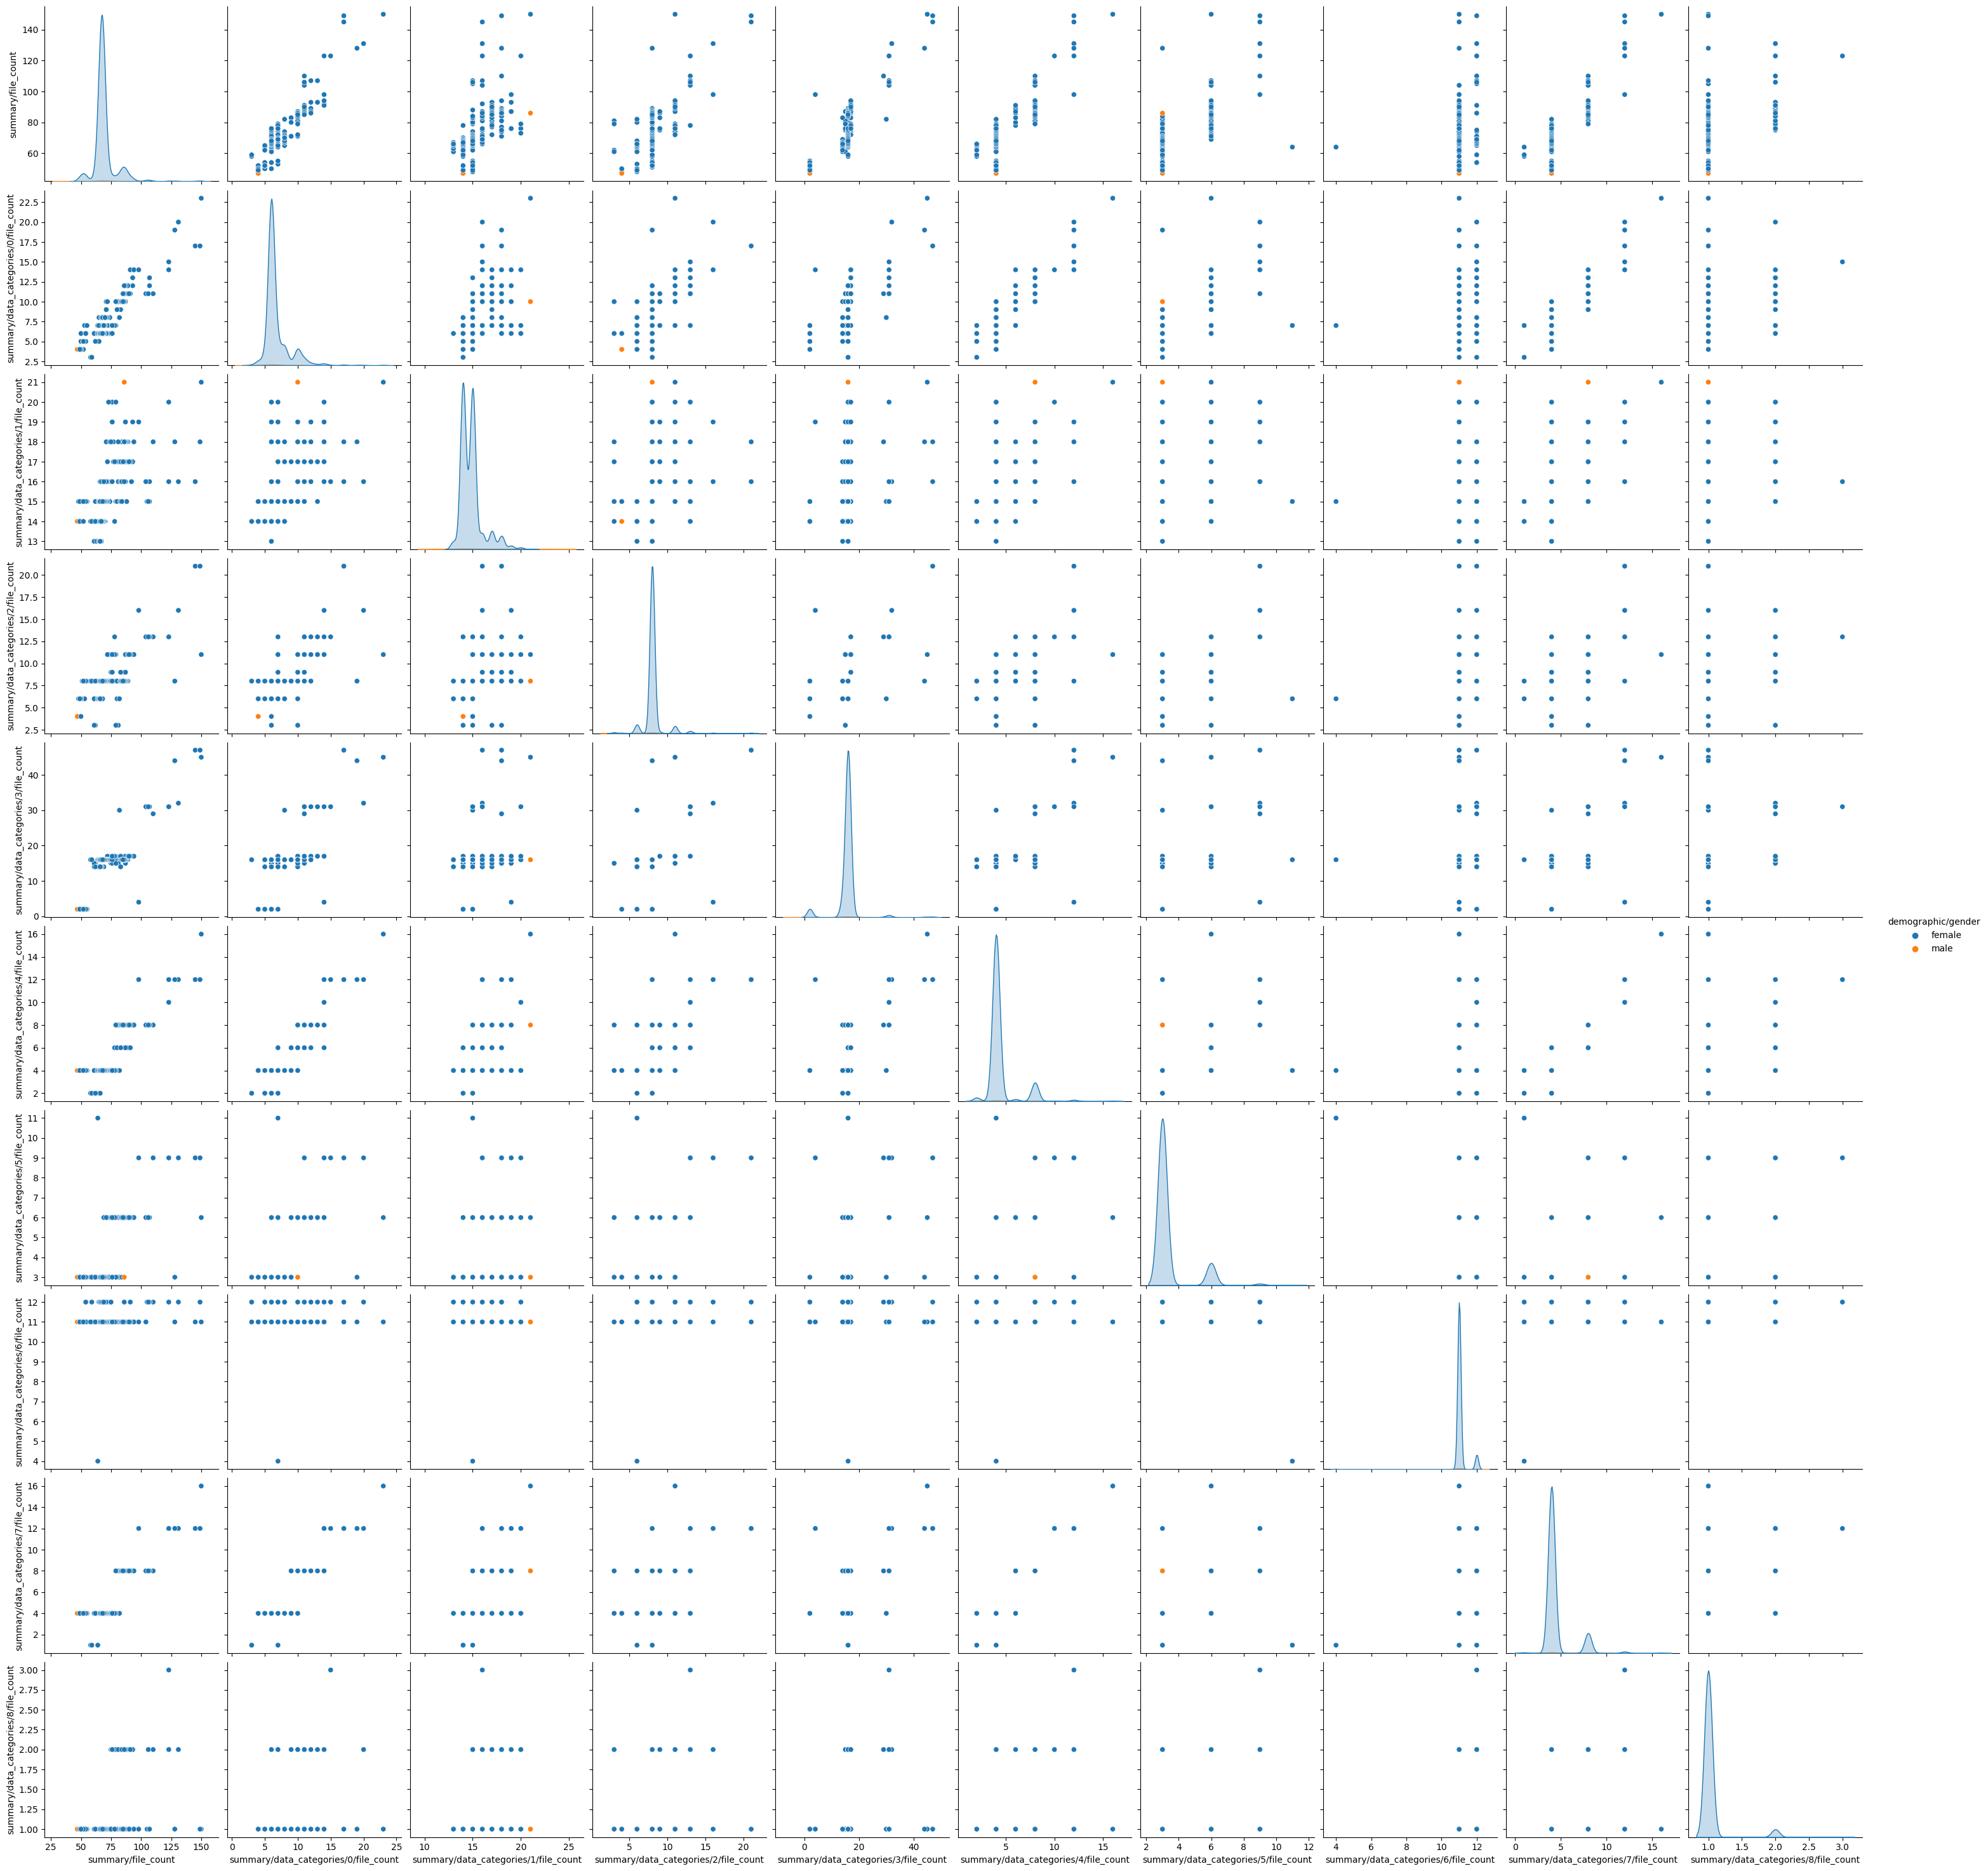

In [22]:
sns.pairplot(train_normal.drop('summary/data_categories/0/data_category', axis=1), hue='demographic/gender', size=3)

In [ ]:
#HEATMAP

<Axes: >

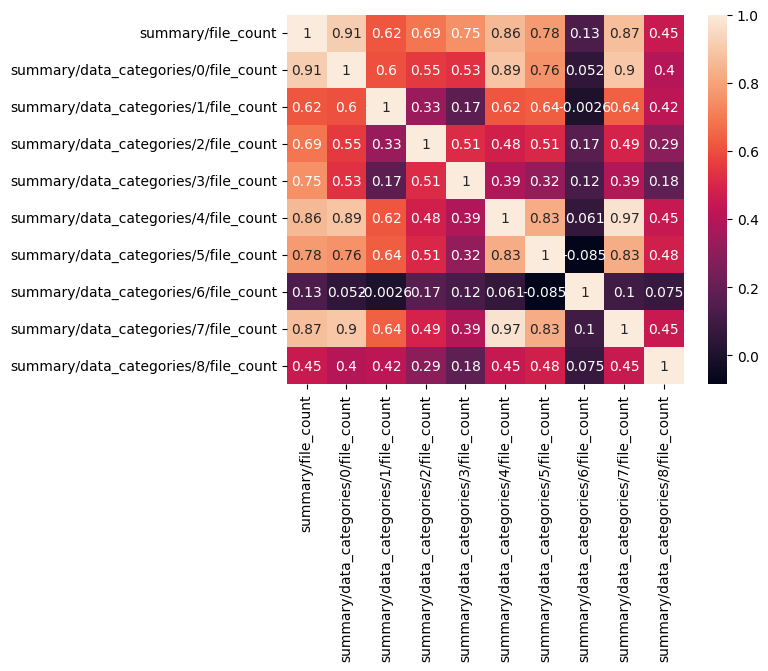

In [23]:
sns.heatmap(train_normal.corr(), annot=True)

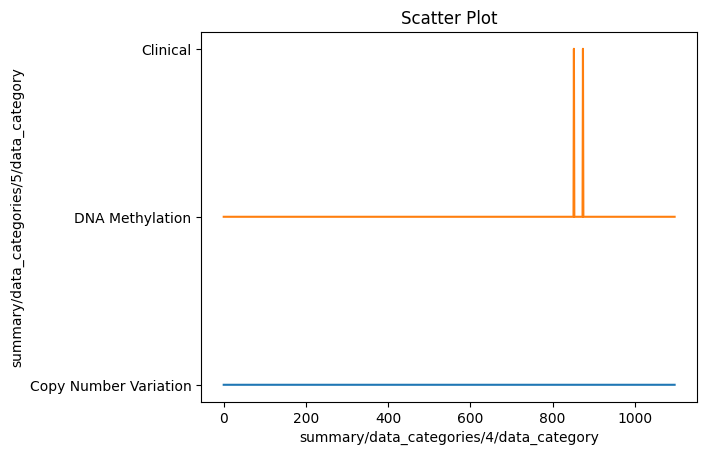

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the database
data = pd.read_csv("/content/breast cancer.csv")

# Scatter plot with day against tip
plt.plot(data['summary/data_categories/2/data_category'])
plt.plot(data['summary/data_categories/5/data_category'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('summary/data_categories/4/data_category')
plt.ylabel('summary/data_categories/5/data_category')

plt.show()


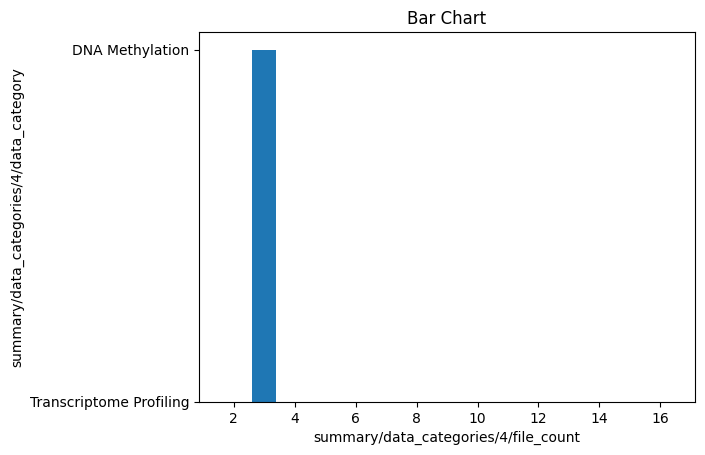

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the database
data = pd.read_csv("/content/breast cancer.csv")

# Bar chart with day against tip
plt.bar(data['summary/data_categories/4/file_count'], data['summary/data_categories/4/data_category'])

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('summary/data_categories/4/file_count')
plt.ylabel('summary/data_categories/4/data_category')

# Adding the legends
plt.show()


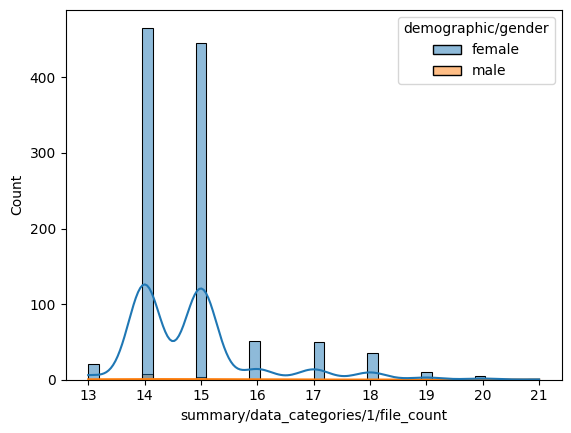

In [26]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
data = pd.read_csv("/content/breast cancer.csv")

sns.histplot(x='summary/data_categories/1/file_count', data=data, kde=True, hue='demographic/gender')

plt.show()


## ML ALGORITHMS AND CROSS VALIDATION ANALYSIS

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(train_shuffled_X, train_shuffled_y)

GaussianNB()

In [ ]:
predict_GNB = model_GNB.predict(test_total_X)
acc_GNB = accuracy_score(test_total_y, predict_GNB)
print("Accuracy:", acc_GNB*100, "%")

Accuracy: 99.77152899824253 %

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(train_shuffled_X, train_shuffled_y)

LogisticRegression()

In [ ]:
predict_LogReg = model_LogReg.predict(test_total_X)
acc_LogReg = accuracy_score(test_total_y, predict_LogReg)
print("Accuracy:", acc_LogReg*100, "%")

Accuracy: 99.99121265377856 %

In [ ]:
#SVM MODEL ON OUR DATA 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
model = SVC()
model.fit(train_shuffled_X, train_shuffled_y)

SVC()

In [ ]:
predict_model = model.predict(test_total_X)
acc_SVM = accuracy_score(test_total_y, predict_model)
print("Accuracy:", acc_SVM*100, "%")

Accuracy: 99.8945518453427 %

In [ ]:
#KNN MODEL ON OUR DATA 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=7)
  

knn.fit(train_shuffled_X, train_shuffled_y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predict_knn = knn.predict(test_total_X)
acc_KNN = accuracy_score(test_total_y, predict_knn)
print("Accuracy:", acc_KNN*100, "%")

Accuracy: 100.0 %

In [ ]:
## Cross Validation

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
# KF = KFold(10, True)
SSS = StratifiedKFold(n_splits=10)

In [28]:
total_X = train_normal.drop(['summary/data_categories/0/data_category', 'summary/data_categories/1/data_category', 'summary/data_categories/2/data_category','summary/data_categories/3/data_category',
                                        'summary/data_categories/4/data_category','summary/data_categories/5/data_category',
                                        'summary/data_categories/6/data_category','summary/data_categories/7/data_category','summary/data_categories/8/data_category',
                                        'primary_site','project/project_id','submitter_id','demographic/gender'], axis=1)
total_y = test_normal['summary/data_categories/1/file_count']

In [ ]:
# Logistic Regression
model_LogReg_crossval = LogisticRegression()
predict_LogReg_crossval = cross_val_score(model_LogReg_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_LogReg = predict_LogReg_crossval.mean()
print("Cross validated accuracies:", predict_LogReg_crossval)
print("Average cross validated accuracy:", avg_crossval_score_LogReg*100, "%")

Cross validated accuracies: [1.              1.             1.         1.            1.            0.99982425
 0.99929701 0.99947276 1.         0.99982425]

Average cross validated accuracy: 99.98418277680142 %

In [ ]:
# Naive Bayes
model_GNB_crossval = GaussianNB()
predict_GNB_crossval = cross_val_score(model_GNB_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GNB = predict_GNB_crossval.mean()
print("Cross validated accuracies:", predict_GNB_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GNB*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99824253
 0.9943761  0.9943761  1.         0.99560633]
 
Average cross validated accuracy: 99.82601054481546 %

In [ ]:
# SVM
model_SV_crossval = SVC()
predict_SV_crossval = cross_val_score(model_SV_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_SV = predict_SV_crossval.mean()
print("Cross validated accuracies:", predict_SV_crossval)
print("Average cross validated accuracy:", avg_crossval_score_SV*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99947276
 0.9973638  0.99718805 1.         0.99789104]
 
Average cross validated accuracy: 99.91915641476274 %

In [ ]:
# KNN
model_KN_crossval = KNeighborsClassifier(n_neighbors=7)
predict_KN_crossval = cross_val_score(model_KN_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_KN = predict_KN_crossval.mean()
print("Cross validated accuracies:", predict_KN_crossval)
print("Average cross validated accuracy:", avg_crossval_score_KN*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99982425
 0.99982425 0.99929701 1.         1.        ]
 
Average cross validated accuracy: 99.98945518453426 %



###Predicting the execution time for this dataset

In [ ]:
import time

START_time = time.time()

END_time = time.time()

total_time = END_time - START_time

print("Total time taken: ", total_time, " seconds")


Total time taken:  3.910064697265625e-05  seconds
